# Practica #2 

In [67]:
import tensorflow.compat.v1 as tf 
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import statistics 
import matplotlib.pyplot as plt
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn.manifold import TSNE
import collections
from sklearn.cluster import KMeans

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

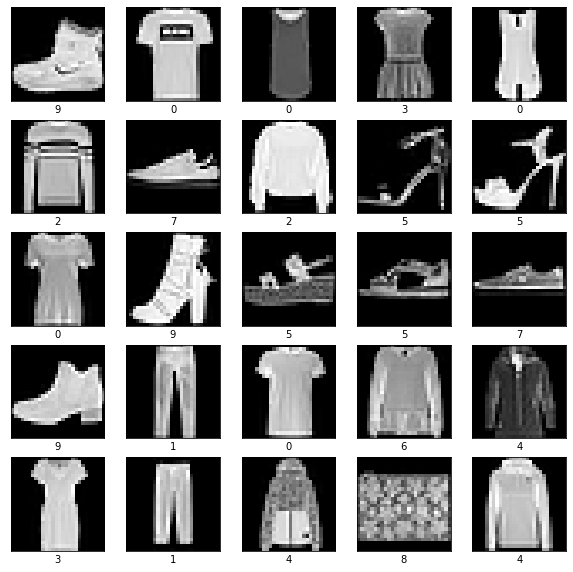

In [4]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

In [5]:
train_images_reshaped = train_images.copy()
train_images_reshaped.shape = (60000, 784)

In [6]:
train_images_reshaped.shape

(60000, 784)

# PCA sin sklearn

In [11]:
def calculateManualPCA(data,ndim):
    media = mean(data.T, axis=1)
    centrado = data - media
    covMat = np.cov(centrado, rowvar=False)
    evals, evecs = eig(covMat)
    explained_variances = []
    nexplained_variances = []
    for i in range(len(evals)):
        if i < ndim:
            nexplained_variances.append(evals[i] / np.sum(evals))  
        explained_variances.append(evals[i] / np.sum(evals))
    print('Varianza total explicada por ' + str(data.shape[1]) + ' Atributos -> ' + str(np.sum(explained_variances)))
    print('Nueva Varianza total explicada por ' + str(ndim) + ' Atributos -> ' + str(np.sum(nexplained_variances)))
    pca = np.dot(evecs.T[0:ndim], data.T).T
    return pca
pca2 = calculateManualPCA(train_images_reshaped[:5000,:], 2)
print(pca2)

Varianza total explicada por 784 Atributos -> 1.0
Nueva Varianza total explicada por 2 Atributos -> 0.4692686479964795
[[ 1908.930928   -2506.76650054]
 [ 3487.22866751  -491.37868368]
 [ 1376.71093713   219.07573284]
 ...
 [  297.95900216  -977.01998505]
 [ 2493.36488083 -2064.82842843]
 [ 1401.20360374   299.78079394]]


In [12]:
def calculatePCATSNE(data, ndim):
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
    tsne_results = tsne.fit_transform(data)
    return tsne_results
tsne2 = calculatePCATSNE(train_images_reshaped[:5000,:], 2)
print(tsne2)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.164s...
[t-SNE] Computed neighbors for 5000 samples in 31.212s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 428.844560
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.229347
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
[[-0.97301805 -1.9407203 ]
 [ 1.4847155   1.2032875 ]
 [ 

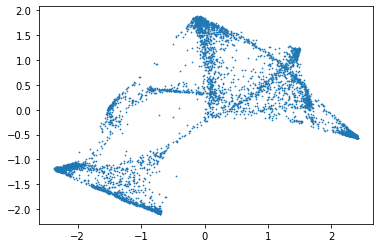

In [22]:
plt.scatter(tsne2[:,0], tsne2[:,1], s = 0.5)
plt.show()

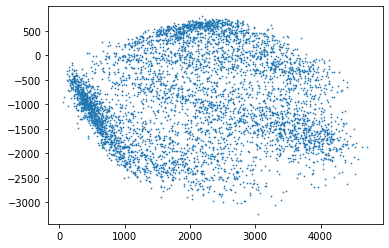

In [23]:
plt.scatter(pca2[:,0], pca2[:,1], s = 0.5)
plt.show()

## Al ver los dos scatterplots definitivamente TSNE logro encontrar algo mas clusterizado

In [89]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
kmeanstsne = KMeans(n_clusters=9, random_state=0).fit(tsne2)
clusters = {}
for i in range(len(kmeanstsne.labels_)):
    if kmeanstsne.labels_[i] not in clusters:
        clusters[kmeanstsne.labels_[i]] = []
    clusters[kmeanstsne.labels_[i]].append(class_names[train_labels[i]])
for i in range(9):
    print(collections.Counter(clusters[i]))

Counter({'Coat': 368, 'Pullover': 367, 'Shirt': 198, 'Bag': 16, 'T-shirt/top': 8, 'Trouser': 8, 'Dress': 5})
Counter({'Sneaker': 410, 'Sandal': 254, 'Bag': 20, 'Ankle boot': 6, 'T-shirt/top': 1, 'Pullover': 1})
Counter({'Trouser': 500, 'Dress': 9, 'Coat': 1, 'Shirt': 1, 'Bag': 1})
Counter({'Dress': 393, 'T-shirt/top': 94, 'Shirt': 45, 'Trouser': 36, 'Coat': 11, 'Bag': 10, 'Pullover': 3})
Counter({'Bag': 300, 'Sandal': 6, 'Shirt': 5, 'T-shirt/top': 4, 'Pullover': 1})
Counter({'Ankle boot': 315, 'Sandal': 14, 'Sneaker': 6})
Counter({'T-shirt/top': 280, 'Shirt': 99, 'Coat': 64, 'Dress': 58, 'Pullover': 8, 'Trouser': 4, 'Bag': 2})
Counter({'Sandal': 203, 'Ankle boot': 181, 'Sneaker': 96, 'Bag': 3, 'Shirt': 1})
Counter({'Shirt': 144, 'Bag': 138, 'Pullover': 124, 'T-shirt/top': 70, 'Coat': 44, 'Dress': 36, 'Sandal': 16, 'Trouser': 8, 'Ankle boot': 4})


In [90]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
kmeanspca = KMeans(n_clusters=9, random_state=0).fit(pca2)
clusters = {}
for i in range(len(kmeanspca.labels_)):
    if kmeanspca.labels_[i] not in clusters:
        clusters[kmeanspca.labels_[i]] = []
    clusters[kmeanspca.labels_[i]].append(class_names[train_labels[i]])
for i in range():
    print(collections.Counter(clusters[i]))

Counter({'Pullover': 244, 'Coat': 235, 'Shirt': 127, 'Bag': 21, 'T-shirt/top': 10, 'Trouser': 5, 'Dress': 2, 'Ankle boot': 1})
Counter({'Sandal': 402, 'Sneaker': 383, 'Bag': 26, 'Ankle boot': 24, 'Pullover': 4, 'Shirt': 2, 'T-shirt/top': 1, 'Coat': 1})
Counter({'Dress': 201, 'Trouser': 126, 'T-shirt/top': 105, 'Shirt': 32, 'Coat': 26, 'Bag': 2, 'Pullover': 2})
Counter({'Pullover': 137, 'Shirt': 111, 'Coat': 106, 'Bag': 84, 'Ankle boot': 31, 'T-shirt/top': 26, 'Dress': 10, 'Sandal': 5, 'Trouser': 3, 'Sneaker': 1})
Counter({'Bag': 240, 'Ankle boot': 152, 'Shirt': 4, 'Coat': 3, 'Pullover': 2, 'Sneaker': 2, 'Sandal': 1, 'T-shirt/top': 1})
Counter({'Trouser': 384, 'Dress': 161, 'T-shirt/top': 50, 'Shirt': 26, 'Coat': 6, 'Bag': 2, 'Pullover': 1})
Counter({'T-shirt/top': 185, 'Coat': 78, 'Shirt': 72, 'Dress': 46, 'Pullover': 25, 'Trouser': 9, 'Bag': 1})
Counter({'Shirt': 110, 'Pullover': 87, 'Dress': 81, 'T-shirt/top': 79, 'Bag': 37, 'Coat': 32, 'Trouser': 29, 'Sandal': 16, 'Ankle boot': 3})


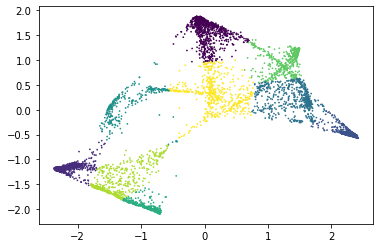

In [93]:
colorOptions = ['black','lime','green','red','cyan','yellow','orange', 'black', 'peru', 'pink']
colors = []
for i in range(5000):
    colors.append(kmeanstsne.labels_[i])
plt.scatter(tsne2[:,0], tsne2[:,1],c=colors, s = 0.5)
plt.show()

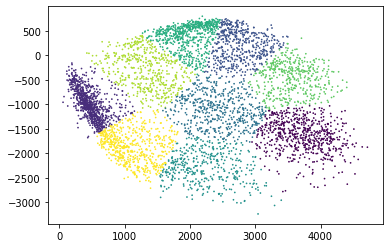

In [94]:
colorOptions = ['black','lime','green','red','cyan','yellow','orange', 'black', 'peru', 'pink']
colors = []
for i in range(5000):
    colors.append(kmeanspca.labels_[i])
plt.scatter(pca2[:,0], pca2[:,1],c=colors, s = 0.5)
plt.show()

# Conclusiones
- Es increible como la reduccion de dimensionalidad logra conservar tanta informacio, en este caso el reducir de 784 a unicamente 2 se preservo el 0.46 de la varianza lo cual es considerable alto comparado con lo que se redujo
- El algoritmo tsne es my efectivo pero es bastante alto en cuanto a consumo de recursos
- En las dos imagenes podemos ver como los clusters tienen sentido en cuanto a sus agrupaciones por ejemplo
 -- {'Pullover': 244, 'Coat': 235}
 {'Ankle boot': 295, 'Sneaker': 126}
- Como nos damos cuenta los algoritmos de aprendizaje supervisado nos ayudan a encontrar patrones o descubrir nueva informacion , en este ejemplo fue claro ya que sabemos las etiquetas pero nos puede servir cuando no tenemos claro lo que buscamos 
 